# Optimización multivariable sin restricciones

La lógica es encontrar los puntos donde la derivada se hace cero

In [18]:
import  numpy as np
import matplotlib.pyplot as plt

$$
\min_{x,y} f(x,y)
$$

$$
f(x,y) = (x_1 - 1)^4 + 5 (x_2 - 1)^2 - 2 x_1 x_2
$$

In [2]:
import sympy
m, b = sympy.symbols("m, b")

In [3]:
Funcion_Costo = (m-1)**4 + 5 * (b-1)**2 - 2 * m * b

In [4]:
Funcion_Costo

-2*b*m + 5*(b - 1)**2 + (m - 1)**4

In [5]:
Derivada_Funcion_Costo = [Funcion_Costo.diff(m) , Funcion_Costo.diff(b)]

In [6]:
Derivada_Funcion_Costo

[-2*b + 4*(m - 1)**3, 10*b - 2*m - 10]

In [7]:
Gradiente = sympy.Matrix(Derivada_Funcion_Costo)

In [8]:
Gradiente

Matrix([
[-2*b + 4*(m - 1)**3],
[    10*b - 2*m - 10]])

In [9]:
Hesseiana = [[Funcion_Costo.diff(m,m), Funcion_Costo.diff(m,b)], 
             [Funcion_Costo.diff(b,m), Funcion_Costo.diff(b,b)]]

In [10]:
Hesseianaa = sympy.Matrix(Hesseiana)

In [11]:
Hesseianaa

Matrix([
[12*(m - 1)**2, -2],
[           -2, 10]])

Ahora que se tienen las expresiones simbólicas para el gradiente y para la matriz hessiana se deben crear las funciones vectorizadas para esas expresiones usando sympy.lambdify. https://docs.sympy.org/latest/modules/numeric-computation.html

In [12]:
f_lmbda = sympy.lambdify((m, b), Funcion_Costo, 'numpy')
fprime_lmbda = sympy.lambdify((m, b), Derivada_Funcion_Costo, 'numpy')
fhess_lmbda = sympy.lambdify((m, b), Hesseiana, 'numpy')

In [13]:
def func_XY_to_X_Y(f):
    """
    permite tomar dos vectores al mismo tiempo
    """
    return lambda X: np.array(f(X[0], X[1]))

In [15]:
f = func_XY_to_X_Y(f_lmbda)
fprima = func_XY_to_X_Y(fprime_lmbda)
fhessiana = func_XY_to_X_Y(fhess_lmbda)

Ahora las funciones ya son vectorizadas tal como lo necesita el módulo de optimización "optimize.fmin_ncg"

Nonlinear conjugate gradient method.

Se usa el punto inicial (0, 0)

In [25]:
import scipy
from scipy import optimize
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprima, fhess=fhessiana)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


In [21]:
x_opt

array([1.88292613, 1.37658523])

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_ncg.html

In [26]:
[x_opt ,allvecs] = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess, retall=True )

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


In [23]:
x_opt

array([1.88292613, 1.37658523])

In [24]:
allvecs

[array([0, 0]),
 array([0.4496124 , 1.12403101]),
 array([1.32956573, 1.26591315]),
 array([1.7448923 , 1.34897846]),
 array([1.9017924 , 1.34897846]),
 array([1.88189115, 1.37549659]),
 array([1.88285849, 1.37663473]),
 array([1.88292613, 1.37658523]),
 array([1.88292613, 1.37658523])]

In [47]:
x_opt

array([1.88292613, 1.37658523])

Analicemos la gráfica de la función objetivo y la solución:

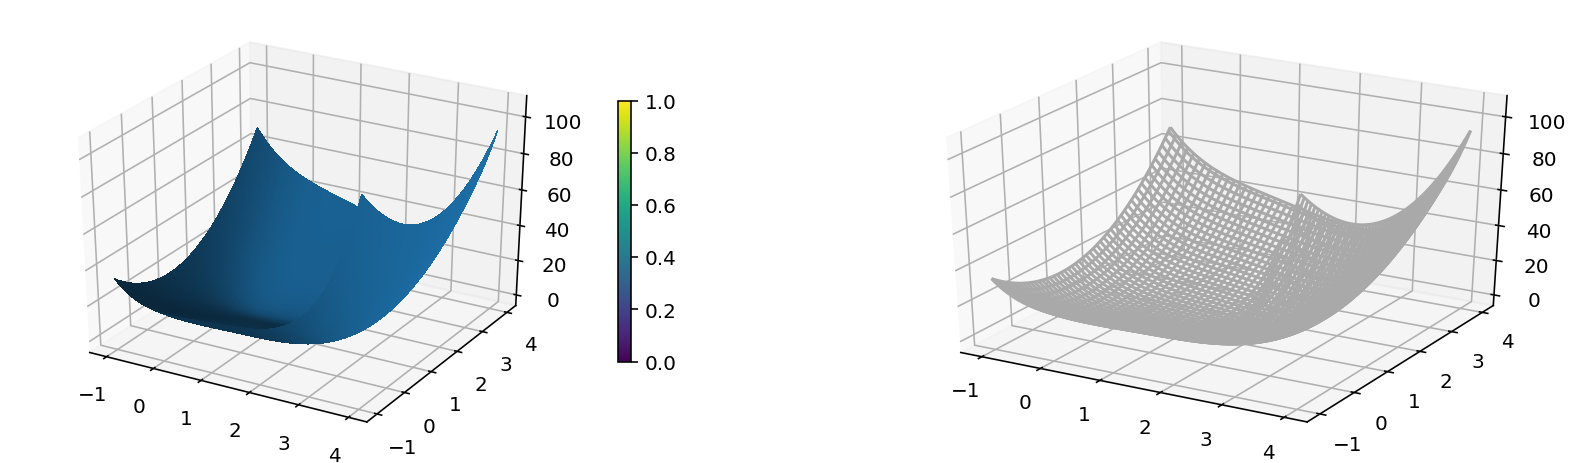

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('qt4agg')
fig, axes = plt.subplots(1, 2, figsize=(14, 4), subplot_kw={'projection': '3d'})
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
Z = (X-1)**4 + 5*(Y-1)**2 - 2*X*Y
#plt.plot_surface(X,Y,Z)

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1,linewidth=0, antialiased=False) 
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2,
color="darkgrey")


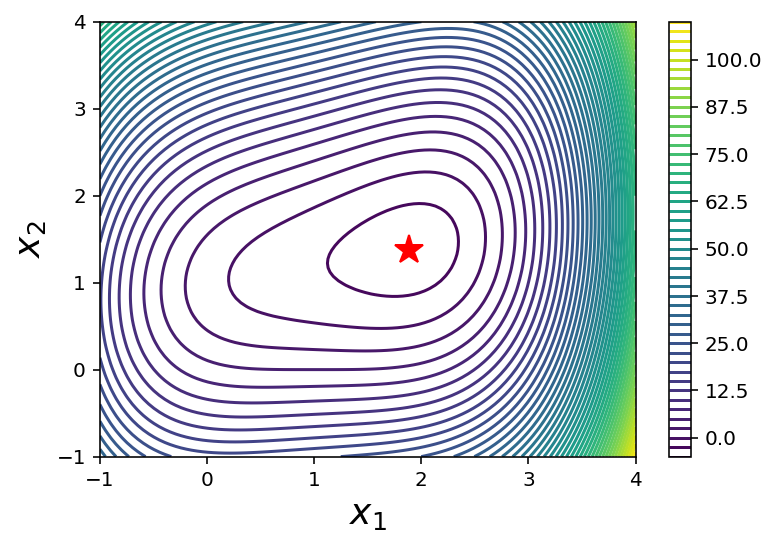

In [49]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

Esta es la gráfica de contorno de la función objetivo $f(x) = (m-1)^4 + 5 (b-1)^2 - 2mb$ el punto mínimo está marcado con una estrella.

In [4]:
import numpy as np

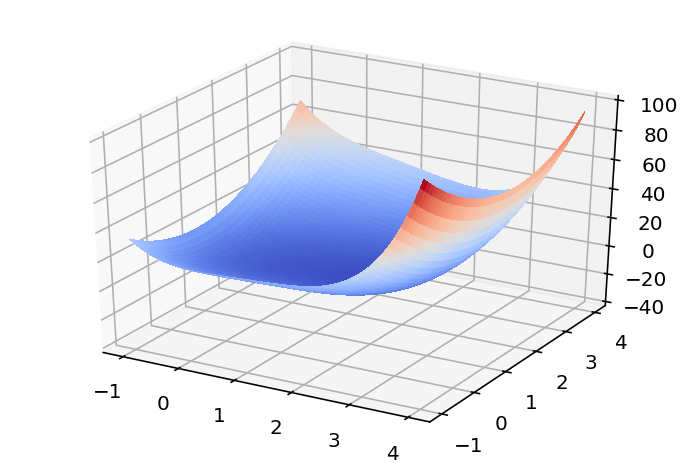

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
Z = (X-1)**4 + 5*(Y-1)**2 - 2*X*Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# limites del eje z.
ax.set_zlim(-40.01, 100)

plt.show()

### Uso de otras funciones de optimización

optimize.fmin_bfgs : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html

optimize.fmin_cg : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html

In [39]:
x_opt2 = optimize.fmin_bfgs(f, (0, 0), fprime=fprima)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [40]:
x_opt2

array([1.88292645, 1.37658596])

In [41]:
x_opt3 = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [42]:
x_opt3

array([1.88292612, 1.37658523])

# Actividad

#### 1. (Toy model) Ahora aplicar el método de optimización seleccionado para resolver el problema de regresión lineal

$$
y = \beta_0 + \beta_1 x
$$

###### que se ajusten a los datos $(x, y):\{(1,2),(3,4),(5,6)\}$

#### 2. Construya el modelo de regresión con los datos del archivo 'data1.txt'